In [1]:
import torch
import torch.nn as nn
import math
from torchviz import make_dot

# Сеть с множеством выходов 

Если сеть имеет множество выходов, то backward по их сумме эквивалентен backward-у по каждой из них 

## Пример 

In [2]:
criterion = nn.MSELoss()

In [3]:
class TinyModel(torch.nn.Module):

    def __init__(self):
        super(TinyModel, self).__init__()
    
    def right(self,x):
        a = torch.tanh(x)
        b = torch.tan(a)
        return b.sum()
        
    def center(self,x):
        a = torch.tan(x)
        b = torch.cos(a)
        return b.mean()
    
    def left(self,x):
        a = torch.cos(x)
        b = torch.tanh(a)
        return b.sum()
        
    
    def forward(self, x):
        a = torch.sin(x)
        c = 2 * a
        loss1 = self.left(c[:8])
        loss2 = self.center(c[8:16])
        loss3 = self.right(c[16:24])
        return loss1, loss2, loss3

In [4]:
model = TinyModel()

In [5]:
def get_losses():
    torch.manual_seed(89)
    input = torch.linspace(0., 2. * math.pi, steps=24, requires_grad=True)
    loss1, loss2, loss3 = model(input)
    return input, loss1, loss2, loss3

### backward по сумме ошибок

In [6]:
input, loss1, loss2, loss3 = get_losses()

In [ ]:
loss = loss1, loss2, loss3

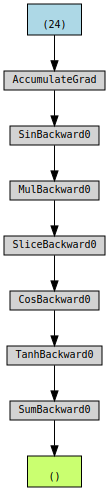

In [9]:
make_dot(loss1, params=dict(model.named_parameters()))

In [10]:
===============================================================================

SyntaxError: invalid syntax (<ipython-input-10-5da5f5f344da>, line 1)

### backward по каждому выходу

In [ ]:
input, loss1, loss2, loss3 = get_losses()

In [ ]:
loss1.backward(retain_graph=True)

In [ ]:
loss2.backward(retain_graph=True)

In [ ]:
loss3.backward()

In [ ]:
print(input.grad)

In [ ]:
make_dot(loss3, params=dict(model.named_parameters()))

### backward по сумме ошибок

In [ ]:
input, loss1, loss2, loss3 = get_losses()

In [ ]:
loss1

In [ ]:
loss = loss1+loss2+loss3
loss.backward()
print(input.grad)

# =====================

In [ ]:
input, loss1, loss2, loss3 = get_losses()

In [ ]:
loss1 += loss2+loss3

In [ ]:
loss1

In [ ]:
loss1.backward()
print(input.grad)